In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
weighted_df = pd.read_csv('weighted_df.csv')
df_final_filtered = pd.read_csv('df_final_filtered.csv')

In [3]:
# 重采样的参数
resample_frequency_seconds = 60  # 每60秒一个数据点

# 计算每个时间戳属于的重采样组
# 使用timestamp直接除以重采样频率，并通过floor操作获取分组标识
df_final_filtered['resample_group'] = (df_final_filtered['timestamp'] / resample_frequency_seconds).astype(int)
weighted_df['resample_group'] = (weighted_df['Time'] / resample_frequency_seconds).astype(int)

# 对每个重采样组进行聚合，计算平均值
df_resampled_bid1 = df_final_filtered.groupby('resample_group').agg({'bid_price1': 'mean'}).reset_index()
df_resampled_ask1 = df_final_filtered.groupby('resample_group').agg({'ask_price1': 'mean'}).reset_index()
df_resampled_weighted = weighted_df.groupby('resample_group').agg({'Weighted_Price': 'mean'}).reset_index()

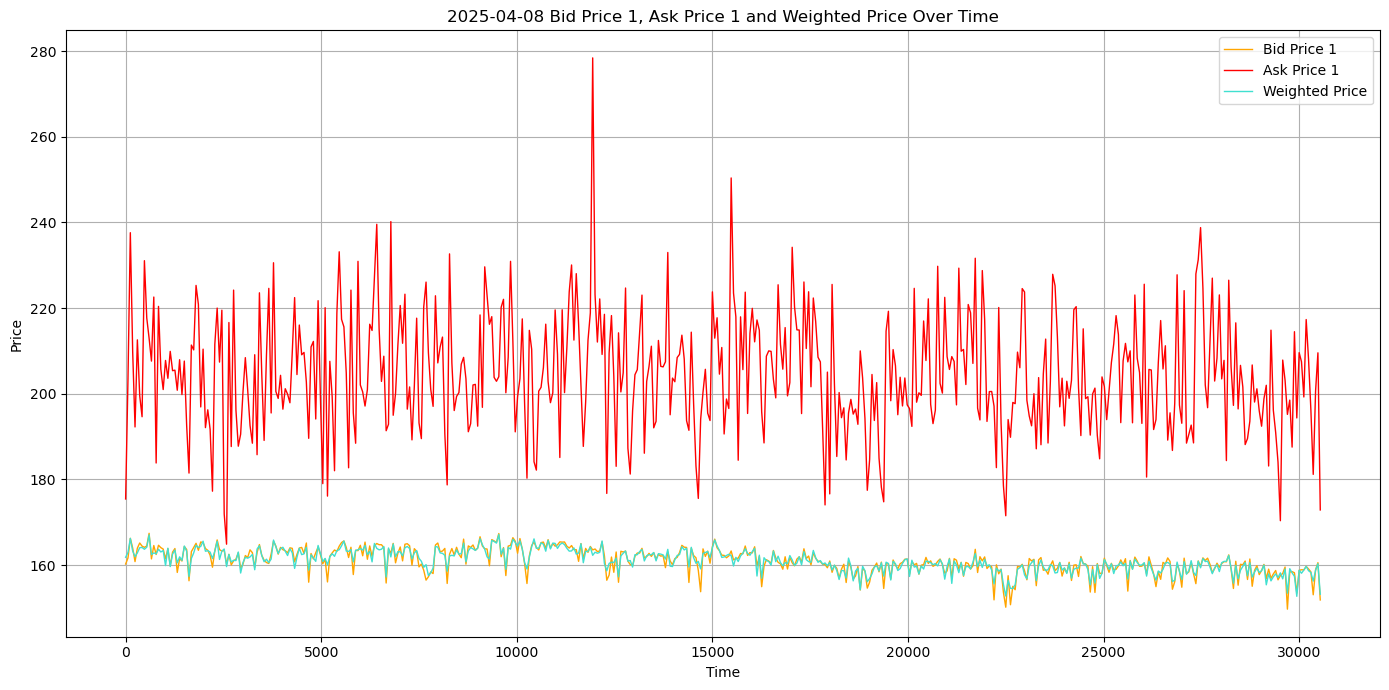

In [4]:
# 进行可视化
plt.figure(figsize=(14, 7))

# 使用重采样后的数据进行绘图
plt.plot(df_resampled_bid1['resample_group'] * resample_frequency_seconds, df_resampled_bid1['bid_price1'], label='Bid Price 1', color='orange', linewidth=1)
plt.plot(df_resampled_ask1['resample_group'] * resample_frequency_seconds, df_resampled_ask1['ask_price1'], label='Ask Price 1', color='red', linewidth=1)
plt.plot(df_resampled_weighted['resample_group'] * resample_frequency_seconds, df_resampled_weighted['Weighted_Price'], color='turquoise', label='Weighted Price', linewidth=1)

# 添加图表标题和坐标轴标签
plt.title('2025-04-08 Bid Price 1, Ask Price 1 and Weighted Price Over Time')
plt.xlabel('Time')
plt.ylabel('Price')

# 添加图例
plt.legend()
plt.grid(True)

# 优化图表布局
plt.tight_layout()

# 显示图表
plt.show()

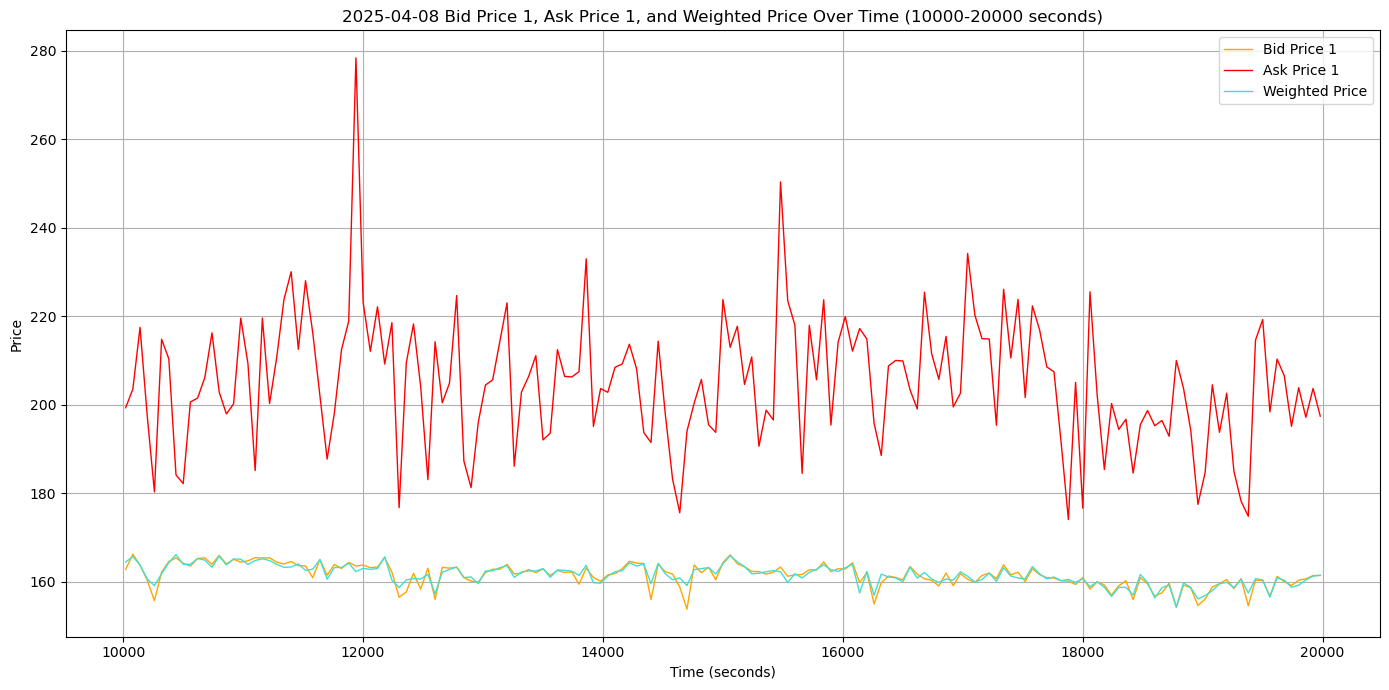

In [5]:
# 读取数据
weighted_df = pd.read_csv('weighted_df.csv')
df_final_filtered = pd.read_csv('df_final_filtered.csv')

# 设置重采样参数，每60秒一个数据点
resample_frequency_seconds = 60

# 计算重采样组
df_final_filtered['resample_group'] = (df_final_filtered['timestamp'] / resample_frequency_seconds).astype(int)
weighted_df['resample_group'] = (weighted_df['Time'] / resample_frequency_seconds).astype(int)

# 对每个重采样组进行聚合，计算平均值
df_resampled_bid1 = df_final_filtered.groupby('resample_group').agg({'bid_price1': 'mean'}).reset_index()
df_resampled_ask1 = df_final_filtered.groupby('resample_group').agg({'ask_price1': 'mean'}).reset_index()
df_resampled_weighted = weighted_df.groupby('resample_group').agg({'Weighted_Price': 'mean'}).reset_index()

# 筛选时间戳在10000到20000之间的数据
df_resampled_bid1 = df_resampled_bid1[(df_resampled_bid1['resample_group'] * resample_frequency_seconds >= 10000) & (df_resampled_bid1['resample_group'] * resample_frequency_seconds <= 20000)]
df_resampled_ask1 = df_resampled_ask1[(df_resampled_ask1['resample_group'] * resample_frequency_seconds >= 10000) & (df_resampled_ask1['resample_group'] * resample_frequency_seconds <= 20000)]
df_resampled_weighted = df_resampled_weighted[(df_resampled_weighted['resample_group'] * resample_frequency_seconds >= 10000) & (df_resampled_weighted['resample_group'] * resample_frequency_seconds <= 20000)]

# 绘制重采样后的数据
plt.figure(figsize=(14, 7))
plt.plot(df_resampled_bid1['resample_group'] * resample_frequency_seconds, df_resampled_bid1['bid_price1'], label='Bid Price 1', color='orange', linewidth=1)
plt.plot(df_resampled_ask1['resample_group'] * resample_frequency_seconds, df_resampled_ask1['ask_price1'], label='Ask Price 1', color='red', linewidth=1)
plt.plot(df_resampled_weighted['resample_group'] * resample_frequency_seconds, df_resampled_weighted['Weighted_Price'], label='Weighted Price', color='turquoise', linewidth=1)

# 添加图表标题和坐标轴标签
plt.title('2025-04-08 Bid Price 1, Ask Price 1, and Weighted Price Over Time (10000-20000 seconds)')
plt.xlabel('Time (seconds)')
plt.ylabel('Price')

# 添加图例
plt.legend()

# 显示网格
plt.grid(True)

# 优化图表布局
plt.tight_layout()

# 显示图表
plt.show()
